#### Importing All Libraries

In [29]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os

#### Changing Current Directory

In [30]:
os.chdir(r'D:\Course\Python Assignments\Geospatial Analysis using Python')

#### Getting Statistics of Raster Data 'aresh.tif'

In [31]:
dataset_source = gdal.Open('aresh.tif', 0)
print('Data Source:\t', dataset_source)
count = dataset_source.RasterCount
print("Raster Count:\t", count)
raster_band = dataset_source.GetRasterBand(1)
print("Raster Band:\t",raster_band)
response = {}  # For starage of data
for counter in range(1, count + 1):
    statistics = dataset_source.GetRasterBand(counter).GetStatistics(0, 1)
    response["Band: {}".format(counter)] = '''Minimum = %.3f, Maximum=%.3f, Mean=%.3f, 
    Standard Deviation=%.3f''' % (statistics[0], statistics[1], statistics[2], statistics[3])
print("Statistics of Raster Data aresh.tif. \n", response)

Data Source:	 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000019EB0467E70> >
Raster Count:	 1
Raster Band:	 <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x0000019EB0472ED0> >
Statistics of Raster Data aresh.tif. 
 {'Band: 1': 'Minimum = 178.000, Maximum=5789.000, Mean=1947.916, \n    Standard Deviation=1009.698'}


#### --- For More Information

##### Reading Other Data

In [32]:
geo_transform = dataset_source.GetGeoTransform()
print('GeoTransform: ')
geo_transform   # Gives the Origin of Raster Data

GeoTransform: 


(81.99986111111112,
 0.0002777777777777778,
 0.0,
 29.00013888888889,
 0.0,
 -0.0002777777777777778)

In [33]:
print("Metadata: \n", dataset_source.GetMetadata())

Metadata: 
 {'AREA_OR_POINT': 'Point', 'DTED_CompilationDate': '0002', 'DTED_DataEdition': '02', 'DTED_DigitizingSystem': 'SRTM      ', 'DTED_HorizontalAccuracy': '0009', 'DTED_HorizontalDatum': 'WGS84', 'DTED_MaintenanceDate': '0000', 'DTED_MaintenanceDescription': '0000', 'DTED_MatchMergeDate': '0000', 'DTED_MatchMergeVersion': 'A', 'DTED_NimaDesignator': 'DTED2', 'DTED_OriginLatitude': '0280000N', 'DTED_OriginLongitude': '0820000E', 'DTED_Producer': 'USCNIMA ', 'DTED_RelHorizontalAccuracy': 'NA  ', 'DTED_RelVerticalAccuracy': '0018', 'DTED_SecurityCode_DSI': 'U', 'DTED_SecurityCode_UHL': 'U  ', 'DTED_UniqueRef_DSI': 'H09 054        ', 'DTED_UniqueRef_UHL': 'H09 054     ', 'DTED_VerticalAccuracy_ACC': '0013', 'DTED_VerticalAccuracy_UHL': '0013', 'DTED_VerticalDatum': 'E96'}


### For All in One Statistics of Raster Data

In [34]:
!gdalinfo -stats aresh.tif

Driver: GTiff/GeoTIFF
Files: aresh.tif
       aresh.tif.ovr
       aresh.tif.aux.xml
Size is 3601, 3601
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (81.999861111111116,29.000138888888891)
Pixel Size = (0.000277777777778,-0.000277777777778)
Metadata:
  AREA_OR_POINT=Point
  DTED_CompilationDate=0002
  DTED_DataEdition=02
  DTED_DigitizingSystem=SRTM      
  DTED_HorizontalAccuracy=0009
  DTED_HorizontalDatum=WGS84
  DTED_MaintenanceDate=0000
  DTED_MaintenanceDescripti

In [35]:
array = raster_band.ReadAsArray()
print("Raster Band Array: \n", array)

Raster Band Array: 
 [[2952 2973 2994 ... 5032 5046 5061]
 [2948 2962 2977 ... 5029 5042 5065]
 [2943 2951 2959 ... 5036 5048 5068]
 ...
 [ 212  216  219 ... 1179 1171 1160]
 [ 213  219  226 ... 1186 1177 1164]
 [ 218  226  233 ... 1190 1184 1170]]


##### Applying Analysis

In [36]:
binary_mask = np.where((array >= np.mean(array)), 1, 0)
print("Binary Mask: \n", binary_mask)

Binary Mask: 
 [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##### Plotting Analysed Image

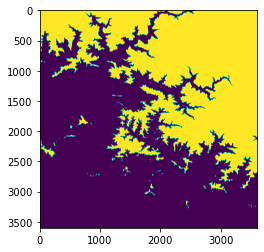

In [37]:
plt.Figure()
plt.imshow(binary_mask)